# Introduction

This notebook iterates through multilinear regression models, using the data from `cleaned_kc.csv`. Models are compared to the baseline R-squared value from the `eda_and_cleaning.ipynb` notebook, which was **0.693.**

## Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime  as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
df = pd.read_csv('data/cleaned_kc.csv')

# Baseline Model

The baseline model is reprinted below for reference:

In [8]:
price = df.price
indep = df.drop('price', axis = 1)

model = sm.OLS(price, indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2678.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:25:13   Log-Likelihood:            -2.9227e+05
No. Observations:               21420   AIC:                         5.846e+05
Df Residuals:                   21401   BIC:                         5.847e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Unnamed: 0        1.1463      0.230      4.985      0.000       0.696       1.597
id            -1.066e-06   4.91e-07     -2.171      0.030   -2.03e-06   -1.04e-07
bedrooms      -3.989e+04   1928.592    -20.681      0.000   -4.37e+04   -3.61e+04
bathrooms      4.343e+04   3318.853     13.085      0.000    3.69e+04    4.99e+04
sqft_living     178.4163      3.716     48.008      0.000     171.132     185.701
sqft_lot          0.1629      0.049      3.351      0.001       0.068       0.258
floors         9626.3517   3599.160      2.675      0.007    2571.730    1.67e+04
waterfront     7.802e+05   1.72e+04     45.359      0.000    7.46e+05    8.14e+05
condition      2.843e+04   2367.971     12.006      0.000    2.38e+04    3.31e+04
grade          1.021e+05   2183.248     46.755      0.000    9.78e+04    1.06e+05
sqft_basement   -10.3250      4.290     -2.406      0.016     -18.735      -1.915
yr_built      -2835.2483     68.528    -41.374      0.000   -2969.568   -2700.929
renovated      5.255e+04   8060.994      6.519      0.000    3.67e+04    6.83e+04
zipcode        -512.8890     18.196    -28.187      0.000    -548.554    -477.223
lat            5.756e+05   1.09e+04     52.899      0.000    5.54e+05    5.97e+05
long          -2.273e+05   1.33e+04    -17.051      0.000   -2.53e+05   -2.01e+05
sqft_living15    35.3535      3.413     10.357      0.000      28.663      42.044
sqft_lot15       -0.3800      0.075     -5.095      0.000      -0.526      -0.234
day_of_year    -105.5502     14.764     -7.149      0.000    -134.490     -76.611
==============================================================================
Omnibus:                    18118.699   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1746616.310
Skew:                           3.551   Prob(JB):                         0.00
Kurtosis:                      46.664   Cond. No.                     6.68e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Continuous And Categorical

## Continuous Variables

It's time to separate categorical and continuous values. Most are fairly obvious in this dataset. From reviewing the rows we can draw some basic assumptions and identify continuous variables. The main one that stands out to me as able to be argued for *either* continuous or categorical is `yr_built`. It all depends on how many years are present in the data.

116 years


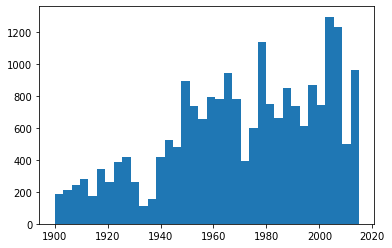

In [9]:
print(df.yr_built.nunique(), 'years')
plt.hist(df.yr_built, bins='auto');

There are 116 unique years in the data set. That's too many to reasonably do dummy variables with. One alternative, if we still wanted categorical sorting, would be to bin it by decade, but that's still 11 new columns. For these reasons, I'm arguing that it be treated as a continuous variable.

With that out of the way, the continuous variables are:

In [10]:
cont = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'lat',
        'long', 'sqft_living15', 'sqft_lot15', 'day_of_year']

In [4]:
# PERFORM LOG TRANSFORMS AND NORMALIZE SHIT AND THEN DO ANOTHER MODEL

## Categorical Variables

The variables that remain are our categorical ones. They will each be treated differently.

The columns `condition`, `grade` `bed`, `bath`, and `floors` are fine as-is.

The columns `waterfront` and `renovated` have already been handled and made binary.

And the `zipcode` values will be grouped based on [this map](https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf) of King County, from the local government's website.

In [5]:
# GROUP ZIPCODES
# MAKE CAT VAR LIST
# DOUBLE CHECK THAT THE FIRST GROUP OF CAT VAR ACTUALLY ARE OKAY AS-IS

In [6]:
# MAKE DUMMIES AND SHIT AND THEN DO ANOTHER MODEL

# Scratch Paper

In [ ]:
zip_dict = {}
for group, zipcode in zip_dict.items():
    df2.zipcode[i] = df2.zipcode[i].replace(zipcode, group)
    
#     BASED ON

address = "123 north anywhere street"

for word, initial in {"NORTH":"N", "SOUTH":"S" }.items():
    address = address.replace(word.lower(), initial)
print(address)

In [21]:
# Code from Kat. Returns rows with price within 3 STD
std_price_df = df[np.abs(df.price - df.price.mean()) <= (3*df.price.std())]
std_price_df

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,343
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,141
21416,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,54
21417,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,174
21418,21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,16


In [22]:
print(np.round(((len(df) - len(std_price_df)) / len(df) * 100), 2), '% loss when removing outliers.')

1.88 % loss when removing outliers.
